In [3]:
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = True
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1

import seaborn as sns
sns.set_palette("deep")
import numpy as np
import pandas as pd
from permutation_helpers import random_data_gen

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

maha_values = np.linspace(0., 1.5, 5)

In [4]:
np.linspace(0., 1.875, 6)

array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875])

## 2D Mahalanobis distance

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


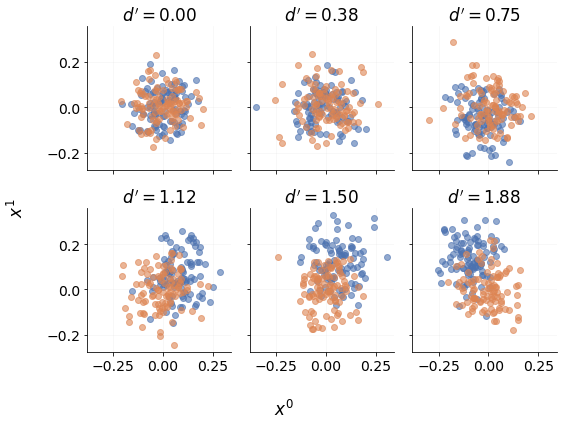

In [219]:
fig, ax = plt.subplots(2, 3, figsize=(8, 6), sharey=True, sharex=True)
ax = ax.ravel()
for i, m in enumerate(np.linspace(0., 1.875, 6)):
    X, y = random_data_gen(n_samples=200, n_feats=2, maha=m)
    ax[i].scatter(X[y, 0], X[y, 1], alpha=.6)
    ax[i].scatter(X[~y, 0], X[~y, 1], alpha=.6)
    ax[i].set_title(f"$d'={m:.2f}$")
fig.supxlabel(r"$x^0$")
fig.supylabel(r"$x^1$")
plt.tight_layout()
plt.savefig("figures/2D_maha_viz.pdf", bbox_inches="tight")

## Load Simulation Data

In [9]:
testsize = None
for m in maha_values.round(2):
    testsize_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_post.pkl")
    testsize_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_pre.pkl")
    testsize_pre['test'] = "pre"; testsize_post['test'] = "post"
    testsize_pre['d'] = m; testsize_post['d'] = m
    testsize = pd.concat([testsize, testsize_pre, testsize_post])
testsize = testsize.reset_index(drop=True)
testsize['positive'] = testsize['pval']<=.05
testsize['param'] = testsize['param'].round(3)

samplesize = None
for m in maha_values.round(2):
    samplesize_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_samplesize_post.pkl")
    samplesize_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_samplesize_pre.pkl")
    samplesize_pre['test'] = "pre"; samplesize_post['test'] = "post"
    samplesize_pre['d'] = m; samplesize_post['d'] = m
    samplesize = pd.concat([samplesize, samplesize_pre, samplesize_post])
samplesize = samplesize.reset_index(drop=True)
samplesize['positive'] = samplesize['pval']<=.05
samplesize['param'] = samplesize['param'].round(3)

nfeats = None
for m in maha_values.round(2):
    nfeats_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_nfeats_post.pkl")
    nfeats_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_nfeats_pre.pkl")
    nfeats_pre['test'] = "pre"; nfeats_post['test'] = "post"
    nfeats_pre['d'] = m; nfeats_post['d'] = m
    nfeats = pd.concat([nfeats, nfeats_pre, nfeats_post])
nfeats = nfeats.reset_index(drop=True)
nfeats['positive'] = nfeats['pval']<=.05
nfeats['param'] = nfeats['param'].round(3)

ratio = None
for m in maha_values.round(2):
    ratio_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_ratio_post.pkl")
    ratio_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_ratio_pre.pkl")
    ratio_pre['test'] = "pre"; ratio_post['test'] = "post"
    ratio_pre['d'] = m; ratio_post['d'] = m
    ratio = pd.concat([ratio, ratio_pre, ratio_post])
ratio = ratio.reset_index(drop=True)
ratio['positive'] = ratio['pval']<=.05
ratio['param'] = ratio['param'].round(3)

In [287]:
sns.lineplot?

Signature:
sns.lineplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and 

# Power

## Test/Train Split

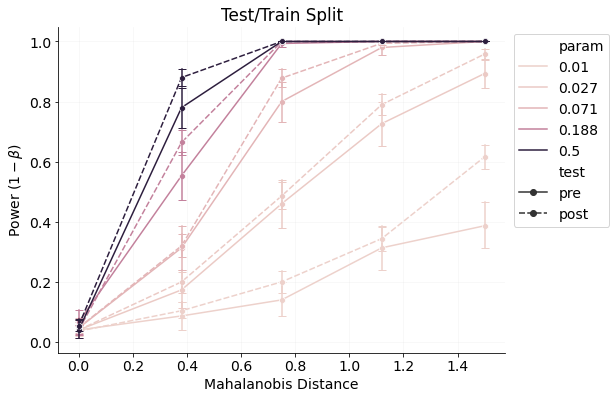

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=testsize, x='d', y='positive', hue='param', style='test', markers=['o', 'o'], err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.set_title("Test/Train Split")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/test-train-split-power.pdf", bbox_inches='tight')

## Sample Size

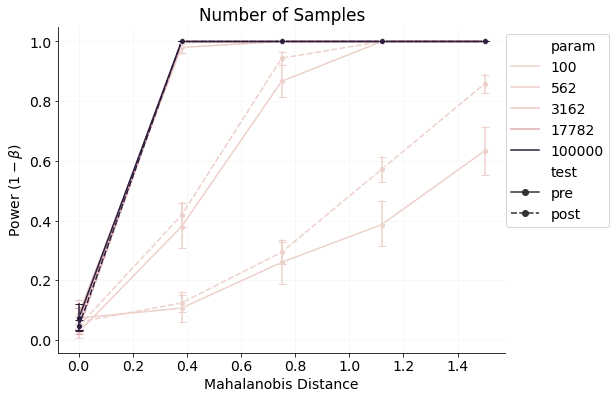

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=samplesize, x='d', y='positive', hue='param', style='test', markers=['o', 'o'], err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.set_title("Number of Samples")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/samplesize-power.pdf", bbox_inches='tight')

## Number of Features

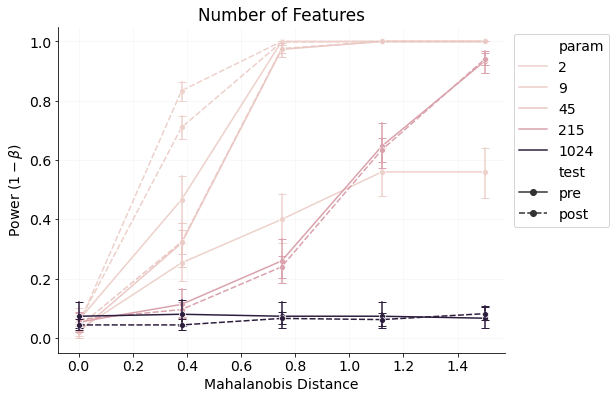

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=nfeats, x='d', y='positive', hue='param', style='test', markers=['o', 'o'], err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.set_title("Number of Features")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/nfeats-power.pdf", bbox_inches='tight')

## Class Balance Ratio

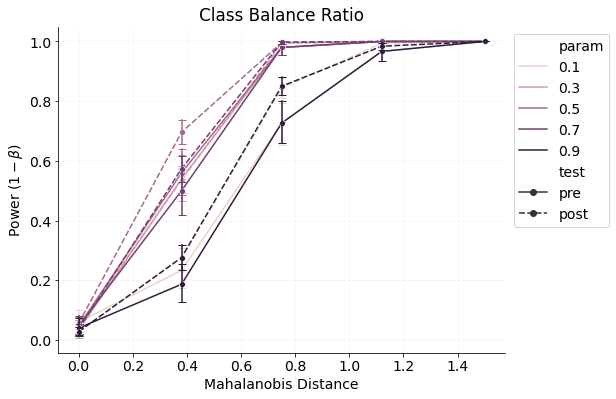

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=ratio, x='d', y='positive', hue='param', style='test', markers=['o', 'o'], err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.set_title("Class Balance Ratio")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/ratio-power.pdf", bbox_inches='tight')

## Are we over-fitting or under-fitting?

In [103]:
maha = pd.concat([maha_post, maha_pre])
expected_auc = auc_from_maha(np.unique(maha["param"]))

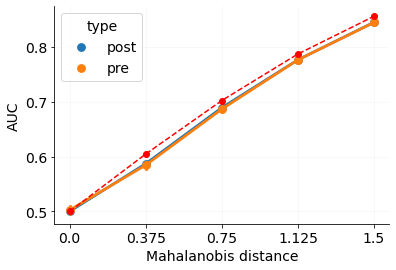

In [110]:
ax = sns.pointplot(data=maha, x="param", y="score", hue='type', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

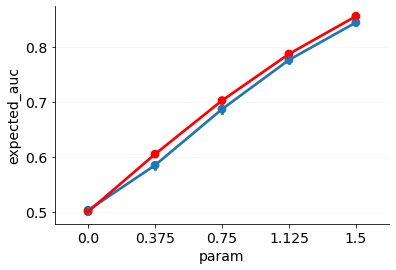

In [97]:
ax = sns.pointplot(data=maha_pre, x="param", y="score",)
sns.pointplot(data=maha_pre, x="param", y="expected_auc", ax=ax, color='red')

In [92]:
samplesize_post = pd.read_pickle("simulate_samplesize_post.pkl")
samplesize_post['type'] = 'post'
samplesize_pre = pd.read_pickle("simulate_samplesize_pre.pkl")
samplesize_pre['type'] = 'pre'
samplesize = pd.concat([samplesize_post, samplesize_pre]).reset_index(drop=True)

samplesize['pos'] = samplesize['pval']<=.05 

Text(0.5, 0, 'N samples')

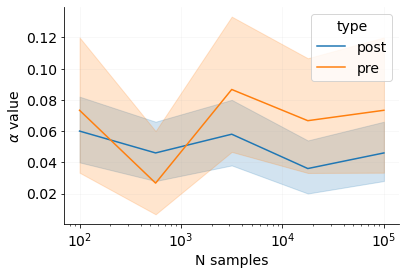

In [98]:
ax = sns.lineplot(data=samplesize, x="param", y="pos", hue='type')
plt.xscale("log")
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"N samples")

In [24]:
import time

In [25]:
time.strftime("%m%d%y_%H:%M")

'032023_14:25'

In [ ]:
samplesize